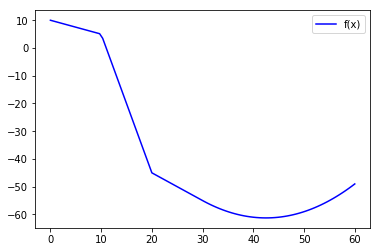

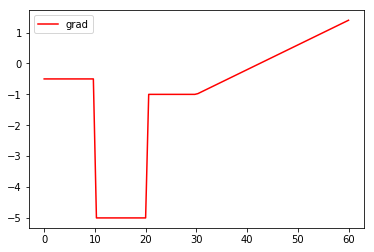

In [74]:
import numpy as np
import torch
import matplotlib.pyplot as plt

class Segment(object):
    
    def __init__(self, b, f):
        # assume start from 0
        self.b = b
        self.f = f
    
    def connectRight(self, other):
        # piece together line segments
        # assume self is on the left, other is on the right
        
        def f(x):
            f1b = self.f(self.b)
            f2b = other.f(self.b)

            if x <= self.b:
                return self.f(x)
            else:
                return other.f(x) - (f2b - f1b)
            
        return Segment(other.b, f)
        
    def plot(self, b=None, c='b'):
        x = np.linspace(0, b or self.b, 100)
        plt.plot(x, [self.f(x_) for x_ in x], label='f(x)', c=c)
        
    def plot_grad(self, b=None, c='b'):
        b = b or self.b
        grads = []
        xs = np.linspace(0, b, 100)
        for x in xs:
            x = torch.nn.Parameter(torch.Tensor([x]))
            y = s.forward(x)
            y.backward()
            grads.append(x.grad.item())
        plt.plot(xs, grads, label='grad', c=c)
        
    def forward(self, x):
        return self.f(x)
            
s1 = Segment(10, lambda x: -0.5*x + 10) # A
s2 = Segment(20, lambda x: -5*x) # D
s3 = Segment(30, lambda x: -1*x + 10) # A
s4 = Segment(100, lambda x: ((x-42.5)/5)**2) # E

s = s1.connectRight(s2).connectRight(s3).connectRight(s4)
s.plot(60)
plt.legend()
plt.show()

s.plot_grad(60, c='r')
plt.legend()
plt.show()
        
    

In [88]:
from lib.optimizer import Diff

x = torch.nn.Parameter(torch.Tensor([0])) # start from 0
optimizer = Diff([x])
#optimizer = torch.optim.Adam([x], lr=1e-3)
#optimizer = torch.optim.SGD([x], lr=1e-3)

def closure():
    optimizer.zero_grad()
    l = s.forward(x) # x is parameter
    l.backward()
    return l

for i in range(10000):
    if i % 500 == 0:
        print('x[{}]={}'.format(i, x.item()))
    l = optimizer.step(closure)

x[0]=0.0
x[500]=3.5120701789855957
x[1000]=10.4623441696167
x[1500]=17.93706512451172
x[2000]=21.147056579589844
x[2500]=22.887653350830078
x[3000]=25.17403793334961
x[3500]=28.149333953857422
x[4000]=31.858619689941406
x[4500]=35.368770599365234
x[5000]=38.244110107421875
x[5500]=40.31209945678711
x[6000]=41.57229995727539
x[6500]=42.19352340698242
x[7000]=42.42677307128906
x[7500]=42.4885368347168
x[8000]=42.49898910522461
x[8500]=42.499717712402344
x[9000]=42.499778747558594
x[9500]=42.49982833862305
